In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

In [221]:
#Importing data
sk_data = pd.read_csv("/Users/callumrobinson/Documents/Masters/Skills/Group 2/articles.B2M.csv")
print(sk_data)

         PMID                                              Title  \
0    10575721  [Computer-assisted preoperative planning of kn...   
1    10617805  [Urogenital amyloidosis: clinico-pathological ...   
2    10656443  Serum beta-2 microglobulin levels are a signif...   
3    10790290  Exposure of Daudi cells to low-frequency magne...   
4    10793017  Effects of dialyzer reuse on the permeability ...   
..        ...                                                ...   
660  37889281  Artificial intelligence in early detection and...   
661  37972698  Screening the optimal housekeeping genes (HKGs...   
662  38048169  Proteomics Analysis of Serum Reveals Potential...   
663  38053293  Highly efficient genome editing via CRISPR-Cas...   
664  38092161  Identification and validation of stable refere...   

                                              Abstract       ISSN  \
0    The general configuration of replaced knee is ...  0035-1040   
1    Amyloidosis of the genito-urinary tract 

In [222]:
# Finding how many unique names appear multiple times? (surname)
all_names = np.unique(sk_data['FirstAuthorLastname']).tolist()
print(len(all_names))
print(len(sk_data['FirstAuthorLastname']))
print(len(sk_data['FirstAuthorLastname'])-len(all_names))


523
665
142


In [223]:
# Finding how many names appear multiple times (full name)
full_name = sk_data['FirstAuthorForename'] + ' ' + sk_data['FirstAuthorLastname']
print(len(full_name) - len(np.unique(full_name))) #so there are 31 names which appear multiple times
print(full_name)

31
0        E Nerkowski
1        M Esslimani
2        J Rodriguez
3      C A Morehouse
4          J P Matos
           ...      
660     Rupesh Raina
661      Nanjian Luo
662       Taohua Lan
663       A Reum Han
664    Mahanthi Vasu
Length: 665, dtype: object


In [224]:
#which names appear the most frequently
sorted_auth = Counter(full_name)
print(sorted_auth)


Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2, 'E Nerkowski': 1, 'M Esslimani': 1, 'J Rodriguez': 1, 'C A Morehouse': 1, 'J P Matos': 1, 'R Fonseca': 1, 'J B Lopez': 1, 'V Scudla': 1, 'K Ohashi': 1, 'H Zhou': 1, 'J E Dickens': 1, 'N Korolev': 1, 'Sharon L Mount': 1, 'Peter D Lee': 1, 'Guido Tricot': 1, 'José Luis Bedini': 1, 'Torben Moos': 1, 'P Moreau': 1, 'Avital Lev': 1, 'D M Lillington': 1, 'D Barbaric': 1, 'H Zhang': 1, 'Simona Gatto': 1, 'Christopher R E McEvoy': 1, 'E Beillard': 1, 'George T Joh

In [225]:
#Removing authors who only appear once
multi_auth = Counter(x for x in sorted_auth.elements() if sorted_auth[x] > 1)
print(multi_auth)

Counter({'Mariana Ferreira Leal': 4, 'Meredith C Foster': 3, 'Changhoon Yoo': 3, 'Nontaphat Thongsin': 3, 'Xunwei Wu': 2, 'Taiyi Jin': 2, 'Renfu Yin': 2, 'Yi Ma': 2, 'Robert Rekawiecki': 2, 'C Haas': 2, 'Malgorzata Krzystek-Korpacka': 2, 'Xiuying Li': 2, 'Lesley A Inker': 2, 'I-Hua Chen': 2, 'Kellie B Haworth': 2, 'F M McGovern': 2, 'Shean-Jaw Chiou': 2, 'Johannes Breyer': 2, 'Yu Du': 2, 'Benjamin J Feinberg': 2, 'Gilar Gorji-Bahri': 2, 'Maria Rasmussen': 2, 'Swati Agrawal': 2, 'Guo-Hua Wang': 2, 'Esben Iversen': 2, 'Xiaomeng Hu': 2})


<function matplotlib.pyplot.show(close=None, block=None)>

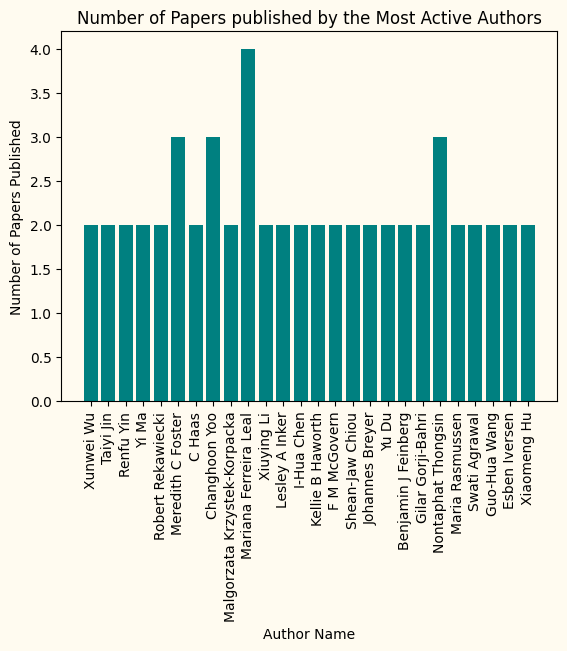

In [249]:
#plot for above data
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')
plt.bar(multi_auth.keys(), multi_auth.values(), color = 'teal')


plt.xlabel('Author Name')

plt.xticks(rotation = 90)
plt.ylabel('Number of Papers Published')
plt.title('Number of Papers published by the Most Active Authors')


plt.show


In [228]:
# Which year had the greatest proportion of B2M papers?
pub_year_data = pd.read_csv('/Users/callumrobinson/Documents/Masters/Skills/Group 2/paper_counts.csv')
b2m_year_data = Counter(sk_data['Year'])

In [229]:
print(pub_year_data)

     Year    Count
0    1799        1
1    1801        1
2    1802        1
3    1805        1
4    1866        1
..    ...      ...
138  2020  1132241
139  2021  1277048
140  2022  1324650
141  2023  1302390
142  2024    15611

[143 rows x 2 columns]


In [230]:
# adding and cleaning b2m data
b2m_year_data = pd.DataFrame.from_dict(b2m_year_data, orient='index').reset_index()
b2m_year_data = b2m_year_data.rename(columns={'index':'Year', 0:'Count'})
b2m_year_data = b2m_year_data.sort_values(by = ['Year'])
print(b2m_year_data)

    Year  Count
2   1997      2
5   1998      1
0   1999      3
1   2000      5
3   2001      2
4   2002      9
6   2003      4
7   2004      8
8   2005      5
9   2006     11
10  2007     13
11  2008     15
12  2009     18
13  2010     12
14  2011     28
15  2012     25
16  2013     38
17  2014     42
18  2015     48
19  2016     44
20  2017     36
21  2018     38
22  2019     45
23  2020     36
24  2021     53
25  2022     63
26  2023     61


In [231]:
# Cleaning pubmed data
pub_year_data = pub_year_data.iloc[115:-1,:]
pub_year_data = pub_year_data.reset_index(drop = True)

In [232]:
print(pub_year_data)

    Year    Count
0   1997   313743
1   1998   329438
2   1999   340740
3   2000   373439
4   2001   388963
5   2002   405519
6   2003   426752
7   2004   459362
8   2005   492511
9   2006   521278
10  2007   548061
11  2008   585286
12  2009   618504
13  2010   653739
14  2011   702139
15  2012   765156
16  2013   809074
17  2014   850568
18  2015   876117
19  2016   896208
20  2017   907250
21  2018   959228
22  2019   999175
23  2020  1132241
24  2021  1277048
25  2022  1324650
26  2023  1302390


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

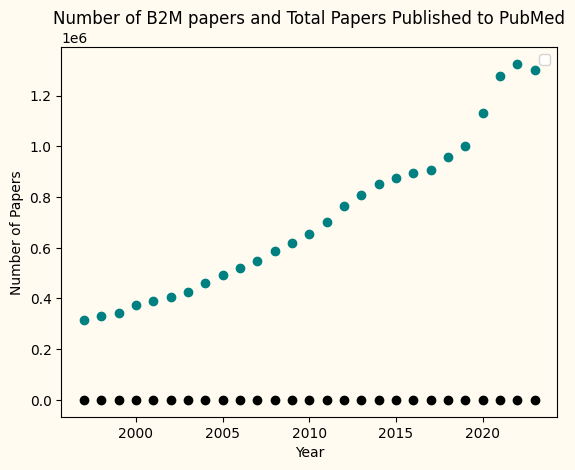

In [255]:
# Plot for total papers published
col = ['teal', 'black']
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')

plt.scatter(pub_year_data['Year'], pub_year_data['Count'], c = 'teal') #Plot
plt.scatter(b2m_year_data['Year'],b2m_year_data['Count'], c = 'black') 

plt.xlabel('Year') # Labels
plt.ylabel('Number of Papers')
plt.title('Number of B2M papers and Total Papers Published to PubMed')

plt.show

In [233]:
#Ratio calculation
year_ratio = b2m_year_data.Count.div(pub_year_data.Count)

In [234]:
print(year_ratio)

0     0.000010
1     0.000015
2     0.000006
3     0.000005
4     0.000023
5     0.000002
6     0.000009
7     0.000017
8     0.000010
9     0.000021
10    0.000024
11    0.000026
12    0.000029
13    0.000018
14    0.000040
15    0.000033
16    0.000047
17    0.000049
18    0.000055
19    0.000049
20    0.000040
21    0.000040
22    0.000045
23    0.000032
24    0.000042
25    0.000048
26    0.000047
Name: Count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

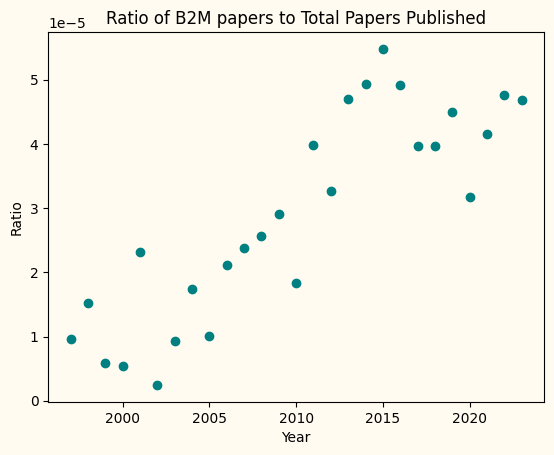

In [250]:
#plot for above data
fig = plt.figure()  #Setting colour to match presentation
fig.patch.set_facecolor('#fffbf0')
ax = plt.axes()
ax.set_facecolor('#fffbf0')

plt.scatter(pub_year_data['Year'], year_ratio, color = 'teal') #Plot

plt.xlabel('Year') # Labels
plt.ylabel('Ratio')
plt.title('Ratio of B2M papers to Total Papers Published')

plt.show
